# Chapter2 지도 학습

: 머신러닝 방법 중 하나인 지도학습이 무엇인지, 어떤 알고리즘을 사용하는지 알아보기

---

### Contents

- 분류와 회귀
- 일반화, 과대적합, 과소적합
- 지도 학습 알고리즘
- 분류 예측의 불확실성 추정

---

### 2.1 분류와 회귀

#### 2.1.1 분류 (Classifiaction)

- 분류는 미리 정의된, 가능성 있는 여러 클래스 레이블 중 하나를 예측하는 것이다
- 두개의 클래스로 분류하면 이진 분류, 셋 이상의 클래스로 분류하면 다중 분류라고 한다
- 출력값은 범주형이어야 한다

#### 2.1.2 회귀 (Regression)

- 회귀는 연속적인 숫자, 프로그래밍 용어로 부동소수점수를 예측하는 것이다
- 출력값은 연속형이어야 한다

---

### 2.2 일반화, 과대적합, 과소적합

#### 2.2.1 일반화 (Generalization)

- 지도학습에선 훈련 데이터로 학습한 모델이 훈련데이터와 특성이 같다면 새로운 데이터를 정확히 예측할 것이다
- 모델이 처음 보는 데이터에 대해 정확하게 예측할 수 있으면 이를 일반화 되었다고 한다.
- 모델은 일반화 되는것이 좋다 (어느 데이터에서나 올바른 예측값을 얻어낼 수 있다는 의미)

#### 2.2.2 과대적합 (Overfitting)

- 가진 정보를 너무 많이 사용해서 복잡한 모델을 만드는 것을 의미한다
- Train data의 성능을 높게 하려고 하기 때문에 Train data에만 최적화된 모델이 생성된다
- 모델이 훈련 세트의 각 샘플에 너무 가깝게 맞춰져서 새로운 데이터에 일반화되기 어렵다

#### 2.2.3 과소적합 (Underfitting)

- 모델이 너무 간단해서 데이터의 면면과 다양성을 잡아내지 못한 것을 의미한다
- 너무 당연한 모델이 만들어질 가능성이 높다 ex) 집이 있는 사람은 모두 요트를 사려고 한다

#### 2.2.4 모델 복잡도와 데이터셋 크기의 관계

- 데이터셋에 다양한 컬럼이 많을수록 과대적합 없이 더 복잡한 모델을 만들 수 있다
- 같은 컬럼을 중복하거나 매우 비슷한 데이터를 모으는 것은 도움이 되지 않는다

---

### 2.3 지도 학습 알고리즘

#### 2.3.1 예제에 사용할 데이터 셋

- Forge : 인위적으로 만든 이진 분류 데이터 (class)
- Wave : 인위적으로 만든 회귀 데이터 (regression)
- Wisconsin Breast Cancer : 유방암 종양의 임상 데이터를 기록해 놓은 데이터 (class)
- Boston Housing : 보스턴 주택가격 관련 정보 데이터 (regression)

X shape : (26, 2)
y shape : (26,)


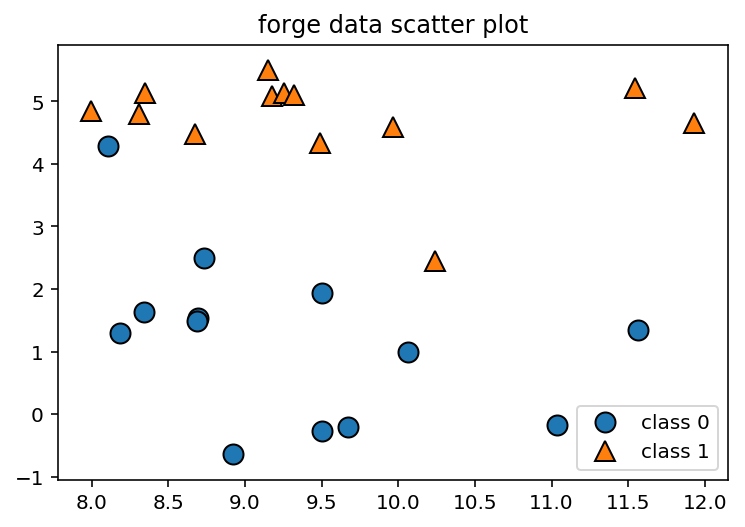

In [1]:
# forge
import mglearn
import matplotlib.pyplot as plt
X, y = mglearn.datasets.make_forge() # data 생성

# plot scatter
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.legend(['class 0', 'class 1'], loc = 4)
plt.title('forge data scatter plot')
print('X shape : {}'.format(X.shape))
print('y shape : {}'.format(y.shape))

plt.show()

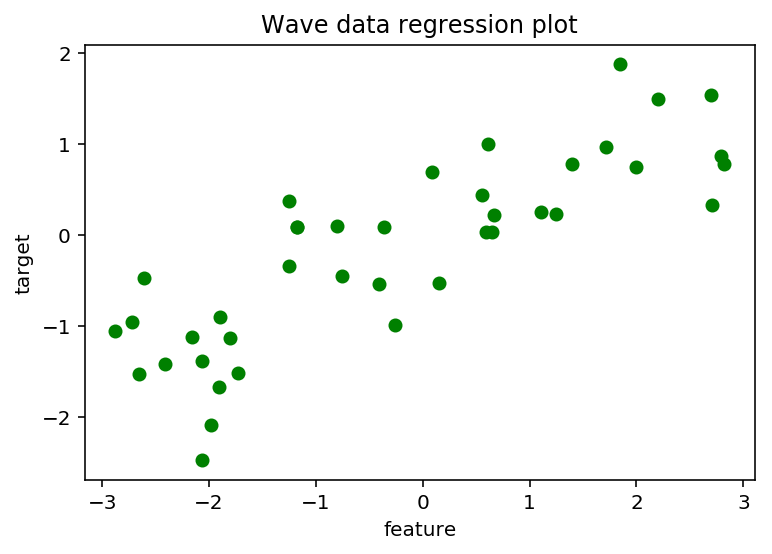

In [2]:
# wave
X, y = mglearn.datasets.make_wave(n_samples = 40)

# plot
plt.plot(X, y, 'go')
plt.title('Wave data regression plot')
plt.xlabel('feature')
plt.ylabel('target')

plt.show()

In [3]:
# cancer
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys(): {}".format(cancer.keys()))

cancer.keys(): dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [4]:
# shape
print('shape : {}'.format(cancer.data.shape))

# feature
print("class별 counts : {}".format(
      {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))

# feature names
print("feature names : \n{}".format(cancer.feature_names))

shape : (569, 30)
class별 counts : {'malignant': 212, 'benign': 357}
feature names : 
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [5]:
# Boston
from sklearn.datasets import load_boston
boston = load_boston()
print("boston.keys(): {}".format(boston.keys()))

boston.keys(): dict_keys(['data', 'target', 'feature_names', 'DESCR'])


In [6]:
# shape
print("shape : {}".format(boston.data.shape))

# feature names
print("feature names : \n{}".format(cancer.feature_names))

shape : (506, 13)
feature names : 
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [7]:
# feature engineering (feature들의 상호작용을 고려)
X, y = mglearn.datasets.load_extended_boston()
print('X shape : {}'.format(X.shape))

X shape : (506, 104)


#### 2.3.2 K-최근접 이웃

- 가장 간단한 머신러닝 알고리즘이다
- 가장 가까운 훈련 데이터 포인트 하나를 최근접 이웃으로 찾아 예측에 사용한다

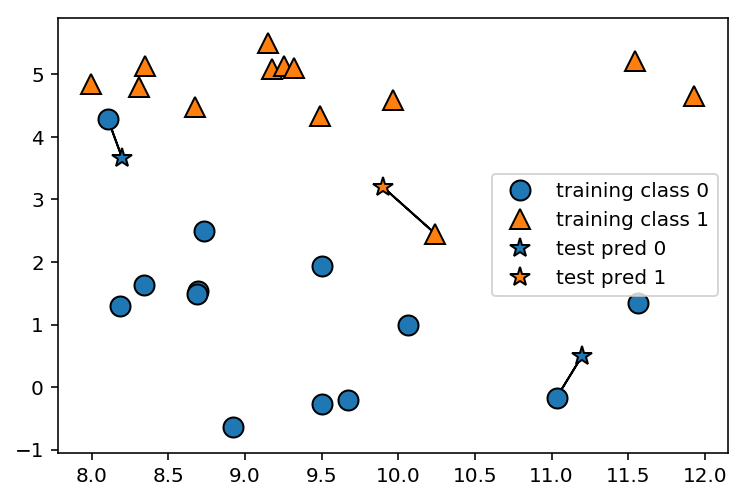

In [8]:
# K-NN (n_neighbors = 1)
mglearn.plots.plot_knn_classification(n_neighbors = 1)

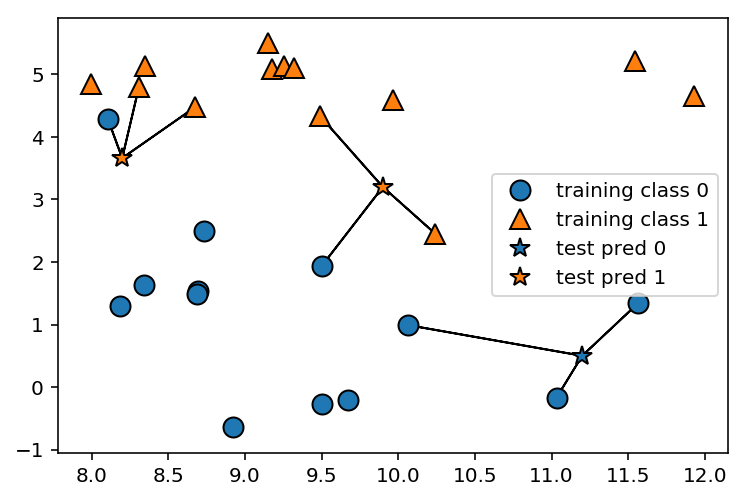

In [9]:
# K-NN (n_neighbors = 3)
mglearn.plots.plot_knn_classification(n_neighbors = 3)

In [10]:
# 알고리즘 적용
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

# data 생성
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [11]:
from sklearn.neighbors import KNeighborsClassifier

# 객체 생성
clf = KNeighborsClassifier(n_neighbors = 3)

In [12]:
# 모델 생성
model = clf.fit(X_train, y_train)
model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [13]:
# predict(예측)
print('Test prediction : {}'.format(model.predict(X_test)))

Test prediction : [1 0 1 0 1 0 0]


In [14]:
# accuracy(정확도)
print('Test accuracy: {:.2f}'.format(model.score(X_test, y_test)))

Test accuracy: 0.86
